In [140]:
import cv2
import os

cam = cv2.VideoCapture("sample_video_3.mp4")

fps = cam.get(cv2.CAP_PROP_FPS)
total_frames = int(cam.get(cv2.CAP_PROP_FRAME_COUNT))
duration = total_frames / fps

desired_frames = 20

interval = int(total_frames / desired_frames)

if not os.path.exists('frames_0'):
    os.makedirs('frames_0')

currentframe = 0
extracted_frames = 0
frame_counter = 0

while extracted_frames < desired_frames:
    cam.set(cv2.CAP_PROP_POS_FRAMES, currentframe)
    ret, frame = cam.read()

    if ret:
        name = f'./frames_2/frame{frame_counter}.jpg'
        print(f'Creating... {name}')
        cv2.imwrite(name, frame)

        extracted_frames += 1

        currentframe += interval
    else:
        break

    frame_counter += 1

cam.release()
cv2.destroyAllWindows()

Creating... ./frames_2/frame0.jpg
Creating... ./frames_2/frame1.jpg
Creating... ./frames_2/frame2.jpg
Creating... ./frames_2/frame3.jpg
Creating... ./frames_2/frame4.jpg
Creating... ./frames_2/frame5.jpg
Creating... ./frames_2/frame6.jpg
Creating... ./frames_2/frame7.jpg
Creating... ./frames_2/frame8.jpg
Creating... ./frames_2/frame9.jpg
Creating... ./frames_2/frame10.jpg
Creating... ./frames_2/frame11.jpg
Creating... ./frames_2/frame12.jpg
Creating... ./frames_2/frame13.jpg
Creating... ./frames_2/frame14.jpg
Creating... ./frames_2/frame15.jpg
Creating... ./frames_2/frame16.jpg
Creating... ./frames_2/frame17.jpg
Creating... ./frames_2/frame18.jpg
Creating... ./frames_2/frame19.jpg


In [141]:
import torch
import torchvision.transforms as transforms
import torchvision.models.detection as models
import matplotlib.pyplot as plt
import os
from PIL import Image

In [142]:
from PIL import Image
import torchvision.transforms as transforms


transform = transforms.Compose([
    transforms.ToTensor(),
])

model = models.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

indimg = 0

def load_image(indimg):
    image_path = f'frames_2/frame{indimg}.jpg'
    image = Image.open(image_path).convert("RGB")
    image = transform(image)
    return image, image_path

images = []
image_paths = []

for i in range(20):
    image, image_path = load_image(indimg)
    images.append(image)
    image_paths.append(image_path)
    indimg += 1


In [144]:

predictions = []

ifaf=0;
with torch.no_grad():
    for image in images:
        print(ifaf)
        ifaf+=1
        prediction = model([image])[0]
        predictions.append({
            'boxes': prediction['boxes'].cpu().numpy(),
            'labels': prediction['labels'].cpu().numpy(),
            'scores': prediction['scores'].cpu().numpy()
        })

first_prediction = predictions[0]
boxes = first_prediction['boxes']
labels = first_prediction['labels']
scores = first_prediction['scores']

print("Boxes:", boxes)
print("Labels:", labels)
print("Scores:", scores)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
Boxes: [[3.0459741e+02 2.6198846e+02 4.3476031e+02 3.7695395e+02]
 [3.9161417e+02 2.6717960e+02 5.5362213e+02 6.0857416e+02]
 [4.3639276e+02 2.5592953e+02 5.3635889e+02 3.4594623e+02]
 [8.9576416e+01 5.9237064e+01 7.0274786e+02 7.1947217e+02]
 [6.1898962e+02 2.1637474e+02 7.2000000e+02 6.2434418e+02]
 [3.6091153e+02 2.5593301e+02 5.3007098e+02 3.5591174e+02]
 [3.9188919e+02 2.5673840e+02 5.4736401e+02 6.0573822e+02]
 [1.6015015e+01 5.3031763e+02 7.2000000e+02 1.2451979e+03]
 [3.0604776e+02 2.6285382e+02 4.3443491e+02 3.0210110e+02]
 [3.1755875e+02 9.6992920e+01 6.7523181e+02 6.3390411e+02]
 [1.4814205e+01 0.0000000e+00 7.2000000e+02 1.1792614e+03]
 [6.0913470e+02 2.0407069e+02 7.1890729e+02 6.1904218e+02]
 [2.5861259e+01 2.1153970e+02 7.2000000e+02 1.2496542e+03]
 [5.9726874e+02 1.2984375e+02 7.1506128e+02 6.1865210e+02]
 [1.8551685e+02 1.6940425e+02 6.7994244e+02 6.7424097e+02]
 [4.2189426e+02 2.5793784e+02 4.9761008e+02 3.6329025e+02]

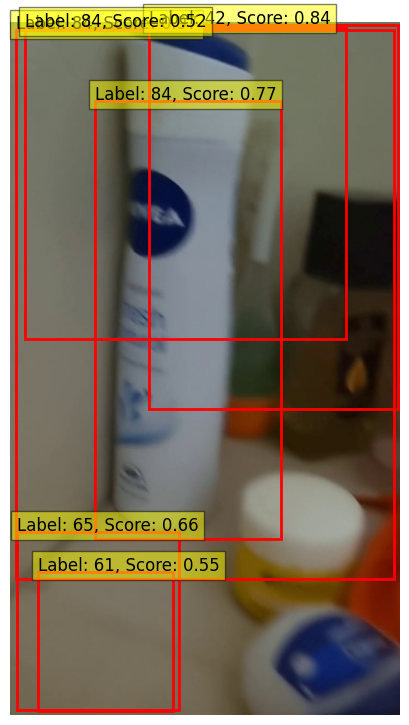

In [169]:
def visualize(image, boxes, labels, scores, threshold=0.5):
    image = image.permute(1, 2, 0).numpy()
    fig, ax = plt.subplots(1, figsize=(12, 9))
    ax.imshow(image)

    for box, label, score in zip(boxes, labels, scores):
        if score >= threshold:
            xmin, ymin, xmax, ymax = box
            width, height = xmax - xmin, ymax - ymin
            ax.add_patch(plt.Rectangle(
                (xmin, ymin), width, height, edgecolor='red', facecolor='none', linewidth=2
            ))
            ax.text(
                xmin, ymin - 2, f'Label: {label}, Score: {score:.2f}',
                bbox=dict(facecolor='yellow', alpha=0.5), fontsize=12, color='black'
            )

    plt.axis('off')
    plt.show()

visualize(images[3], boxes, labels, scores)

In [147]:
!pip install rembg

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pyparsing/core.py", line 817, in _parseNoCache
    loc, tokens = self.parseImpl(instring, pre_loc, doActions)
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pyparsing/core.py", line 2337, in parseImpl
    if instring[loc] == self.firstMatchChar and instring.startswith(
IndexError: string index out of range

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packag

In [148]:

from rembg import remove
from PIL import Image
detected_object_counter=0
def save_detected_objects(image_path, boxes, scores, threshold=0.8, output_dir='detected_objects5'):

    global detected_object_counter ;

    original_image = Image.open(image_path).convert("RGB")

    os.makedirs(output_dir, exist_ok=True)

    for idx, (box, score) in enumerate(zip(boxes, scores)):
        if score >= threshold:
            xmin, ymin, xmax, ymax = map(int, box)
            cropped_image = original_image.crop((xmin, ymin, xmax, ymax))

            base_name = os.path.basename(image_path).split('.')[0]
            save_path = os.path.join(output_dir, f'detected_obj{detected_object_counter}.jpg')

            cropped_image.save(save_path)
            print(f'Saved {save_path}')
            input= Image.open(save_path)
            output=remove(input)
            base_name = os.path.basename(image_path).split('.')[0]
            output_dirs='wbg_detected_objects2'
            save_path = os.path.join(output_dir, f'detected_obj{detected_object_counter}.png')
            output.save(save_path)
            detected_object_counter += 1


In [149]:

for i, prediction in enumerate(predictions):
    boxes = prediction['boxes']
    scores = prediction['scores']
    save_detected_objects(image_paths[i], boxes, scores)

Saved detected_objects5/detected_obj0.jpg
Saved detected_objects5/detected_obj1.jpg
Saved detected_objects5/detected_obj2.jpg
Saved detected_objects5/detected_obj3.jpg
Saved detected_objects5/detected_obj4.jpg
Saved detected_objects5/detected_obj5.jpg
Saved detected_objects5/detected_obj6.jpg
Saved detected_objects5/detected_obj7.jpg
Saved detected_objects5/detected_obj8.jpg
Saved detected_objects5/detected_obj9.jpg
Saved detected_objects5/detected_obj10.jpg
Saved detected_objects5/detected_obj11.jpg
Saved detected_objects5/detected_obj12.jpg
Saved detected_objects5/detected_obj13.jpg
Saved detected_objects5/detected_obj14.jpg
Saved detected_objects5/detected_obj15.jpg
Saved detected_objects5/detected_obj16.jpg
Saved detected_objects5/detected_obj17.jpg
Saved detected_objects5/detected_obj18.jpg
Saved detected_objects5/detected_obj19.jpg
Saved detected_objects5/detected_obj20.jpg
Saved detected_objects5/detected_obj21.jpg
Saved detected_objects5/detected_obj22.jpg
Saved detected_object

In [150]:

import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import numpy as np
from scipy.spatial.distance import cosine

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [151]:

preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = preprocess(image).unsqueeze(0)
    return image.to(device)


In [152]:

model = models.resnet50(pretrained=True)
model = nn.Sequential(*list(model.children())[:-1])
model.eval()
model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [153]:

def extract_features(image_path):
    image = load_and_preprocess_image(image_path)
    with torch.no_grad():
        features = model(image)
    features = features.view(features.size(0), -1)
    return features.cpu().numpy().flatten()


In [172]:

with open('links.txt', 'r') as file:

    lines = file.readlines()


for line in lines:
    link = line.strip()


In [174]:

with open('links.txt', 'r') as file:

    lines = file.readlines()

links = [line.strip() for line in lines]

print(links[0])


﻿https://www.amazon.in/dp/B0CHMZRC89/ref=AF_WIN_bub_w_cml_t_1?pf_rd_r=6MH6HWHV0DVBGP7BG9HN&pf_rd_p=06caf66c-f582-47ea-a71f-3dfebfeef041&pf_rd_m=A1VBAL9TL5WCBF&pf_rd_s=merchandised-search-9&pf_rd_t=&pf_rd_i=1375424031


Sorted filenames: ['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '30.png', '31.png', '32.png', '33.png', '34.png']
Similarity between detected_obj10.jpg and 17.png: 0.80
Link for 17.png: 17. Nan
16


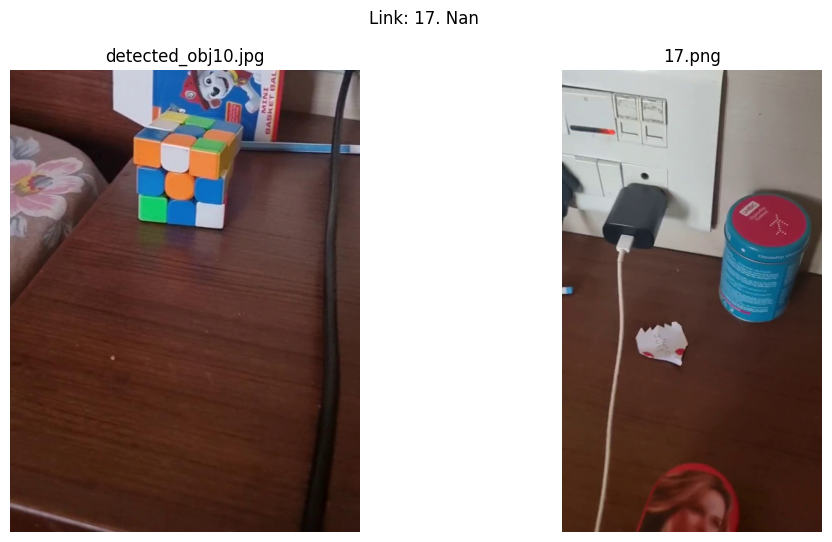

Similarity between detected_obj10.jpg and 27.png: 0.85
Link for 27.png: 27. https://www.amazon.in/PrettyKrafts-Square-Scooby-Doo-Organizer-Storage/dp/B08Q7V12D7/ref=sr_1_9?crid=1MH3ZWLM25S5Z&dib=eyJ2IjoiMSJ9.SACr188L1V70v_0MNMbtyaybyZDe7c56_0Ix-3nsxw3LHSOKd6jvne-WUN0xF-HcvpiTkNW87Vq4Auft_eCGRTCxRhmCJPXzCoEHL7DY21iD90TIEjw-kG6zAOz48QlEWXlR8t9B1--2x8c4NZECU9_fktcBk5DmG7xMX5bp8QJJ1qhyHJvIslX4uvJp_rJv9w5x8G3OxNlcpUHfdYhG86XeyRuFTCUSFyczU1J2thA_MMcZdGeym25lQCJFhIY4tIPhW_W2LSa1NVJfZK2S_Y-M0vNy_T6IuBRZjpk5XJM.j0rhR9KoRRVrRLE-phJ_vf_vRBhnwsMOfQqoWfPER9U&dib_tag=se&keywords=toy+box&qid=1719056970&sprefix=toy+box%2Caps%2C266&sr=8-9
26


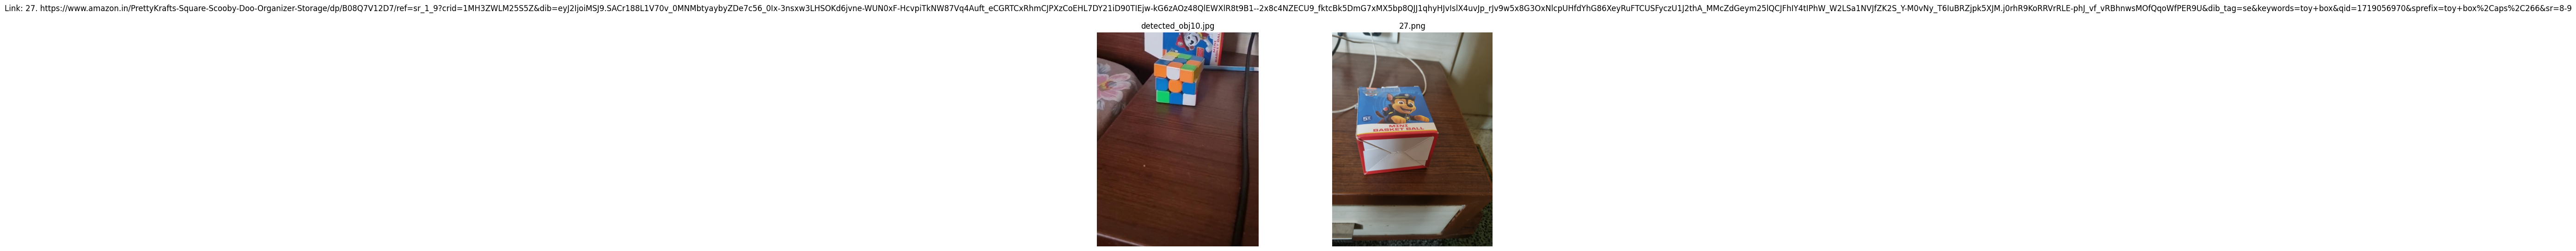

Similarity between detected_obj11.jpg and 25.png: 0.78
Link for 25.png: 25. https://www.amazon.in/Storio-Sticker-Brainstorming-Adjustable-Tightness/dp/B085DZM4JS/ref=sr_1_7?dib=eyJ2IjoiMSJ9.9Ro90BRv762iL0xCfoAhQKJdhCiBw-EYWrOV3nBoTPGRgC_MJDIJqIRbV5H5zv8PdHdJnbEV7vz6GOAuq1VW2qnbDQ7rrbEFHWtWMnfNCwApX4ON_bcGXA2eJEYqaXwBwuzIAF8V-BaHk8ggpKuw_cY1rhHhhtefHWt5F8TnLqrx451zNiWHnHqQPmkqXLNmExqjAc9HtI9NBnTXa7MldH5bNGbO6dExSZJcDv75SdKfp15qhwnssAkcP9J779zupDFy9Qsg4jncXE0FhKlheyo4KRacZeS3ybndF8w5Gzw.Hzp0HJJUlRrZvNTm5SK0WEm4D7wUseJ4OgjiSJl3uDQ&dib_tag=se&keywords=rubik%27s+cube&qid=1719056861&sr=8-7
24


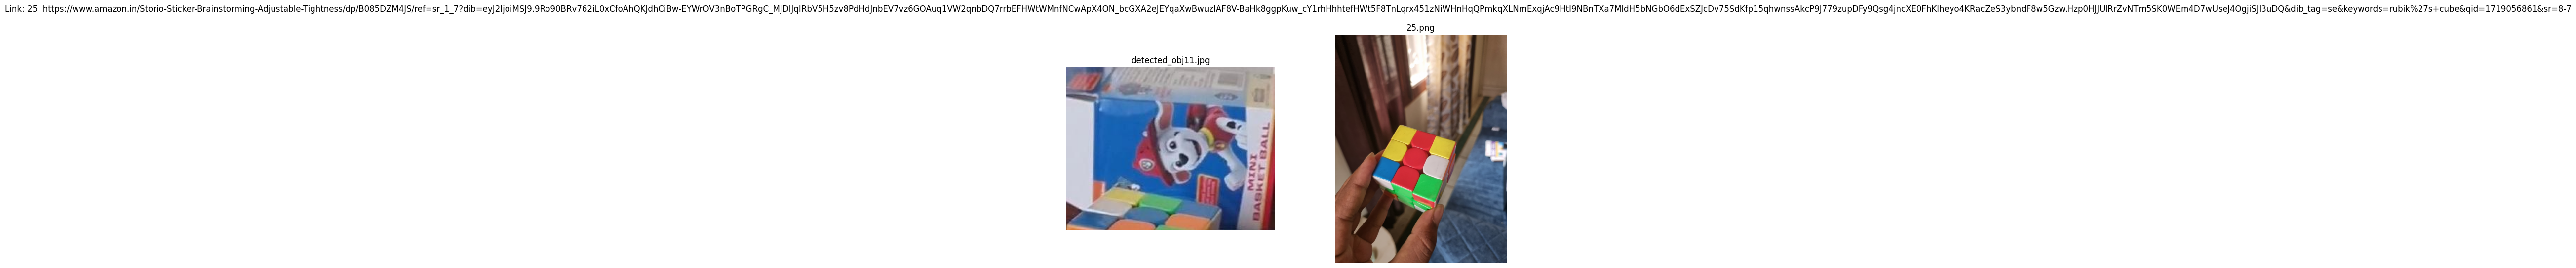

Similarity between detected_obj11.jpg and 29.png: 0.76
Link for 29.png: 29. https://www.amazon.in/Storio-Sticker-Brainstorming-Adjustable-Tightness/dp/B085DZM4JS/ref=sr_1_7?dib=eyJ2IjoiMSJ9.9Ro90BRv762iL0xCfoAhQKJdhCiBw-EYWrOV3nBoTPGRgC_MJDIJqIRbV5H5zv8PdHdJnbEV7vz6GOAuq1VW2qnbDQ7rrbEFHWtWMnfNCwApX4ON_bcGXA2eJEYqaXwBwuzIAF8V-BaHk8ggpKuw_cY1rhHhhtefHWt5F8TnLqrx451zNiWHnHqQPmkqXLNmExqjAc9HtI9NBnTXa7MldH5bNGbO6dExSZJcDv75SdKfp15qhwnssAkcP9J779zupDFy9Qsg4jncXE0FhKlheyo4KRacZeS3ybndF8w5Gzw.Hzp0HJJUlRrZvNTm5SK0WEm4D7wUseJ4OgjiSJl3uDQ&dib_tag=se&keywords=rubik%27s+cube&qid=1719056861&sr=8-7
28


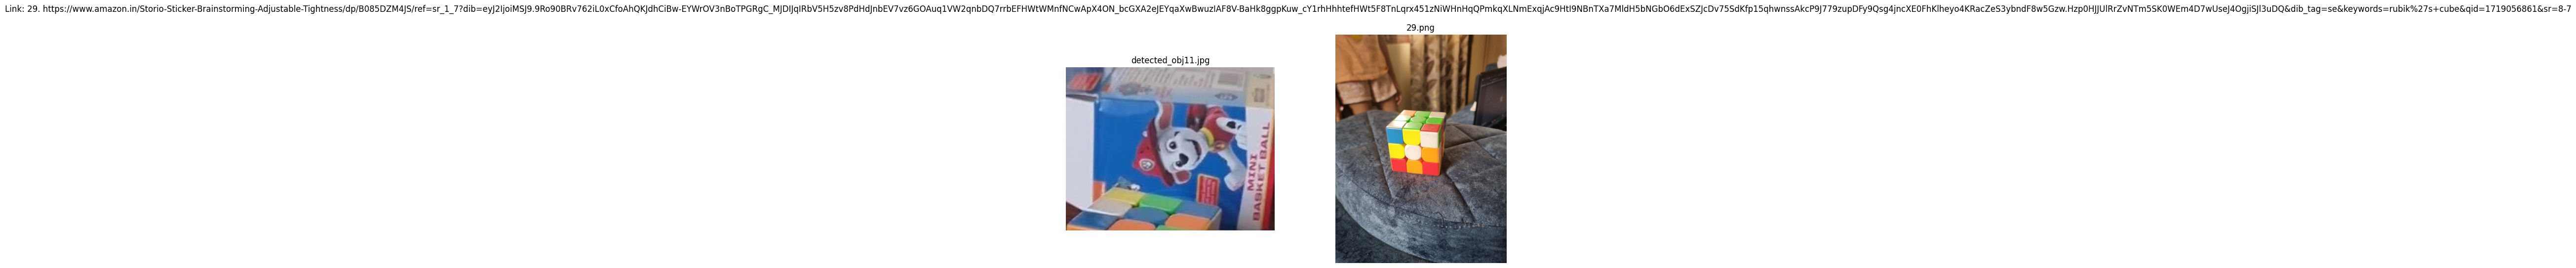

Similarity between detected_obj20.jpg and 27.png: 0.76
Link for 27.png: 27. https://www.amazon.in/PrettyKrafts-Square-Scooby-Doo-Organizer-Storage/dp/B08Q7V12D7/ref=sr_1_9?crid=1MH3ZWLM25S5Z&dib=eyJ2IjoiMSJ9.SACr188L1V70v_0MNMbtyaybyZDe7c56_0Ix-3nsxw3LHSOKd6jvne-WUN0xF-HcvpiTkNW87Vq4Auft_eCGRTCxRhmCJPXzCoEHL7DY21iD90TIEjw-kG6zAOz48QlEWXlR8t9B1--2x8c4NZECU9_fktcBk5DmG7xMX5bp8QJJ1qhyHJvIslX4uvJp_rJv9w5x8G3OxNlcpUHfdYhG86XeyRuFTCUSFyczU1J2thA_MMcZdGeym25lQCJFhIY4tIPhW_W2LSa1NVJfZK2S_Y-M0vNy_T6IuBRZjpk5XJM.j0rhR9KoRRVrRLE-phJ_vf_vRBhnwsMOfQqoWfPER9U&dib_tag=se&keywords=toy+box&qid=1719056970&sprefix=toy+box%2Caps%2C266&sr=8-9
26


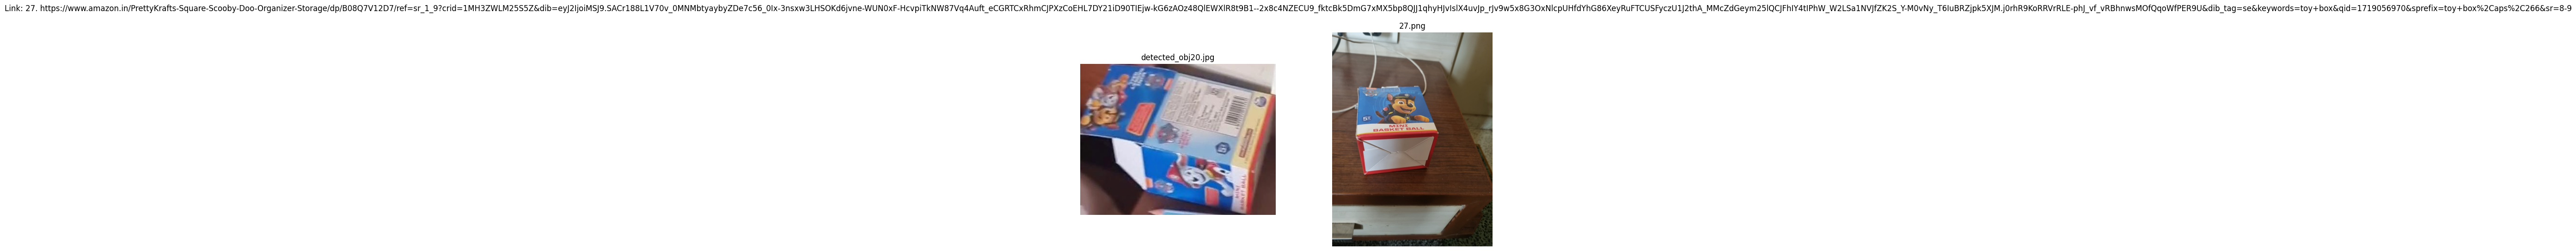

Similarity between detected_obj3.jpg and 1.png: 0.77
Link for 1.png: ﻿1. https://www.amazon.in/dp/B0CHMZRC89/ref=AF_WIN_bub_w_cml_t_1?pf_rd_r=6MH6HWHV0DVBGP7BG9HN&pf_rd_p=06caf66c-f582-47ea-a71f-3dfebfeef041&pf_rd_m=A1VBAL9TL5WCBF&pf_rd_s=merchandised-search-9&pf_rd_t=&pf_rd_i=1375424031
0


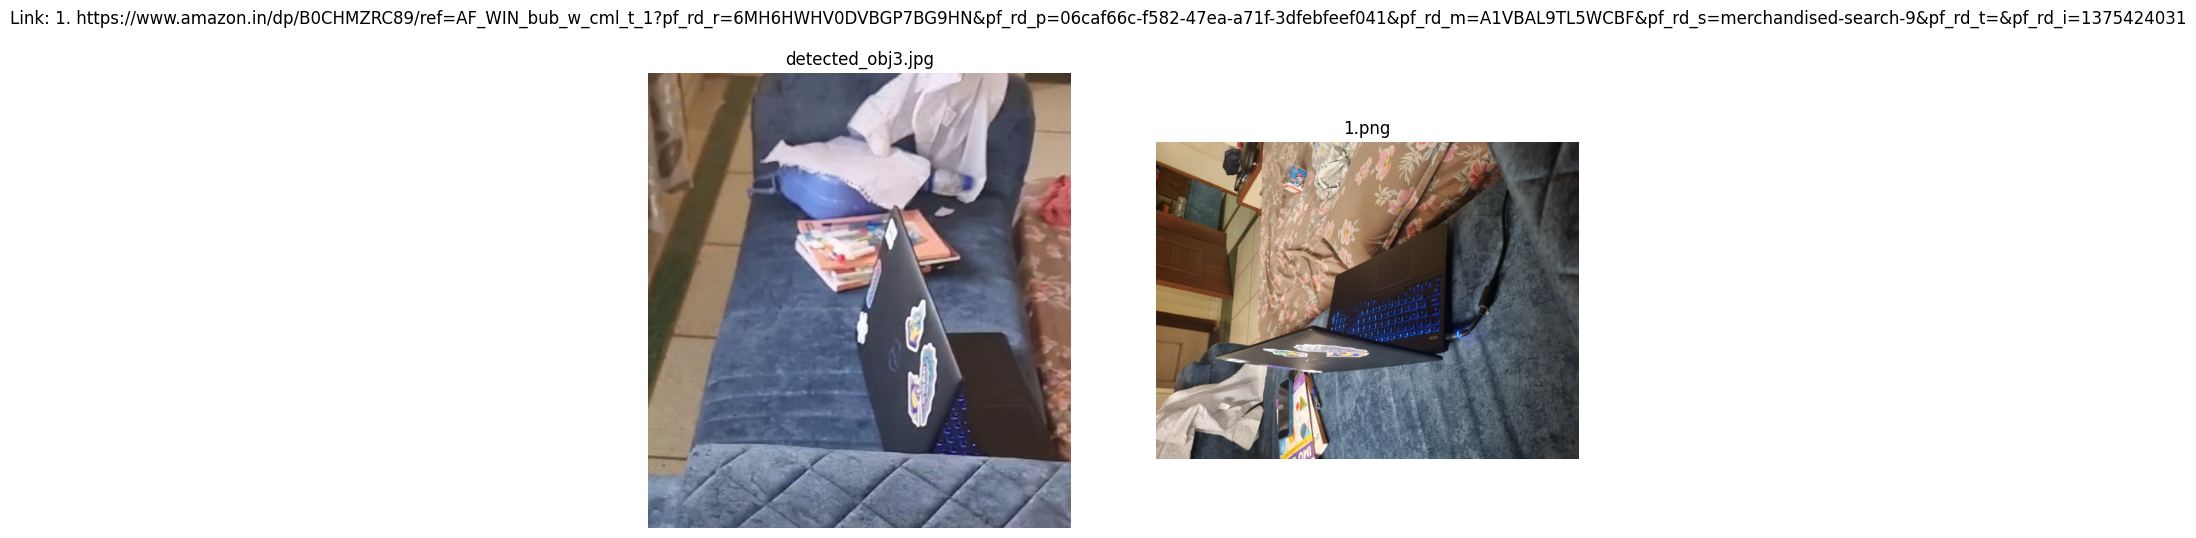

Similarity between detected_obj4.jpg and 2.png: 0.77
Link for 2.png: 2. https://www.amazon.in/Nivea-Nourishing-Lotion-Moisture-Almond/dp/B00IJ72QWQ?source=ps-sl-shoppingads-lpcontext&ref_=fplfs&psc=1&smid=A15APWRK6P7LBV
1


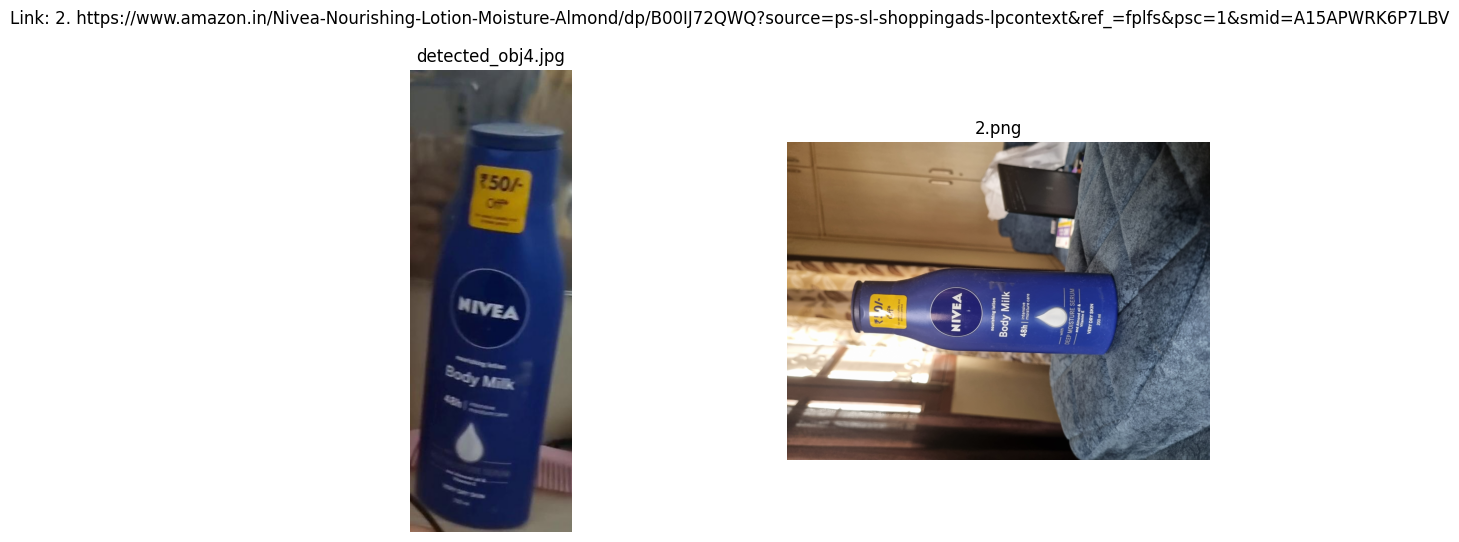

Similarity between detected_obj4.jpg and 31.png: 0.80
Link for 31.png: 31. https://www.amazon.in/Nivea-Extra-Whitening-Repair-Lotion/dp/B019XY4FOU/ref=sr_1_10?crid=2LW5743VO5RYY&dib=eyJ2IjoiMSJ9.yzaaeMXW72of1kKDS_WJXZysTdpWMlFSLNVVnrY3skK6wryiTuRxs3I0ZjM4ymTw0SCt53t8uJ3xm36C2u65az9izbh-2BsczK7Q7t1IfE6NelQH4ZVH5aXg-z9AxCfI5NfTmAsKBcIUAP4ietaPQJ8Z0DQGmrxOkpxoZIuCetIvEWUG9Cufwbc-fIaDlO-qAAtsAy8CHx22hJ3WV4xhtKgX82vKSlYWZfLpNn94JxfDQy5exbDgsEEKXVGGxdAwP1stTvJ-IMsQvooyrTO5DXqxvmQPtZfdx5PurnSRwyM.xzTcq4vygUANB0klAtlv2N2fg4VzbfFaPEvph6CAXNs&dib_tag=se&keywords=nivea&qid=1719056895&s=beauty&sprefix=nive%2Cbeauty%2C223&sr=1-10
30


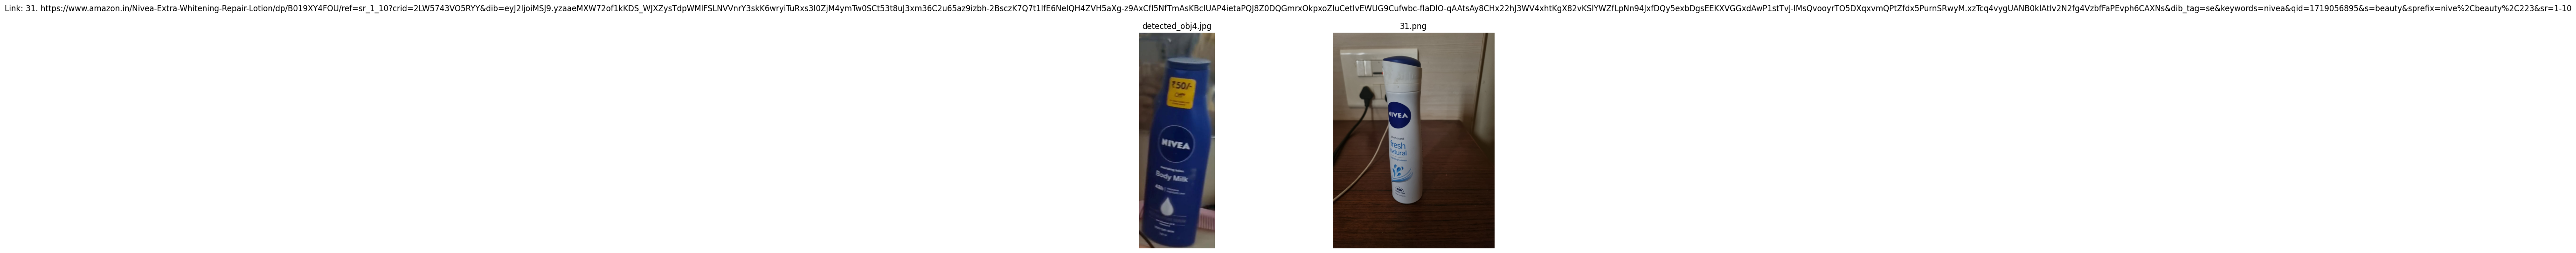

Similarity between detected_obj4.jpg and 33.png: 0.81
Link for 33.png: 33. https://www.amazon.in/Nivea-Nourishing-Lotion-Moisture-Almond/dp/B00IJ72QWQ?source=ps-sl-shoppingads-lpcontext&ref_=fplfs&psc=1&smid=A15APWRK6P7LBV
32


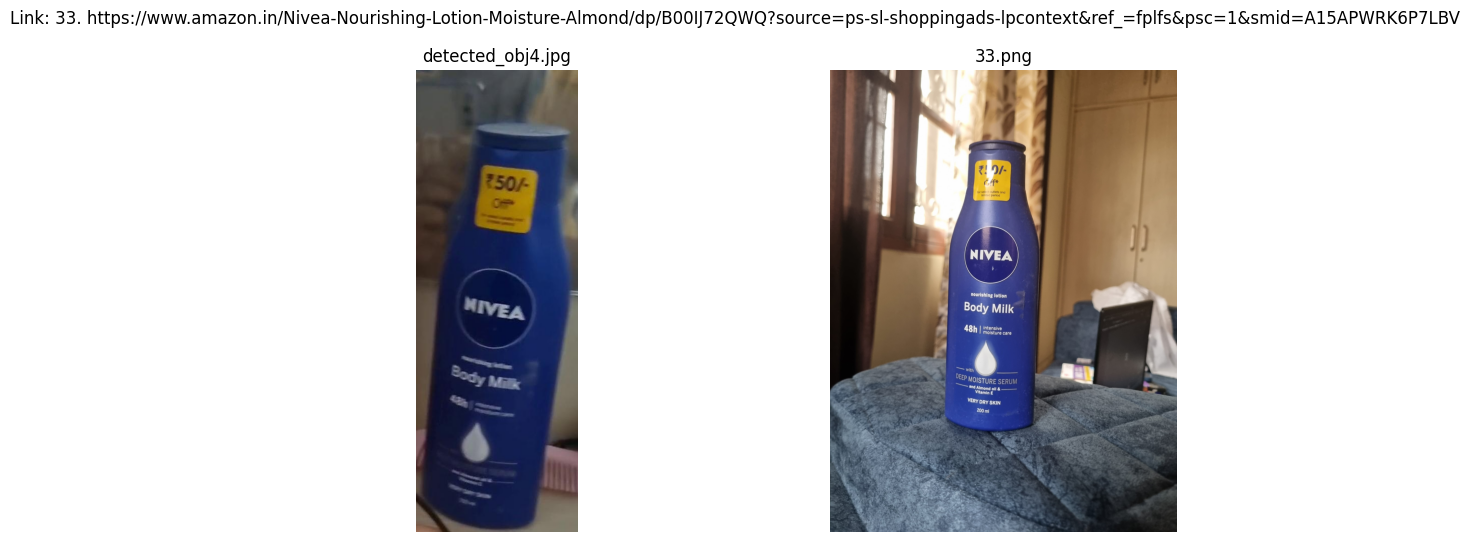

Similarity between detected_obj4.jpg and 34.png: 0.81
Link for 34.png: 34. https://www.amazon.in/Nivea-Nourishing-Lotion-Moisture-Almond/dp/B00IJ72QWQ?source=ps-sl-shoppingads-lpcontext&ref_=fplfs&psc=1&smid=A15APWRK6P7LBV
33


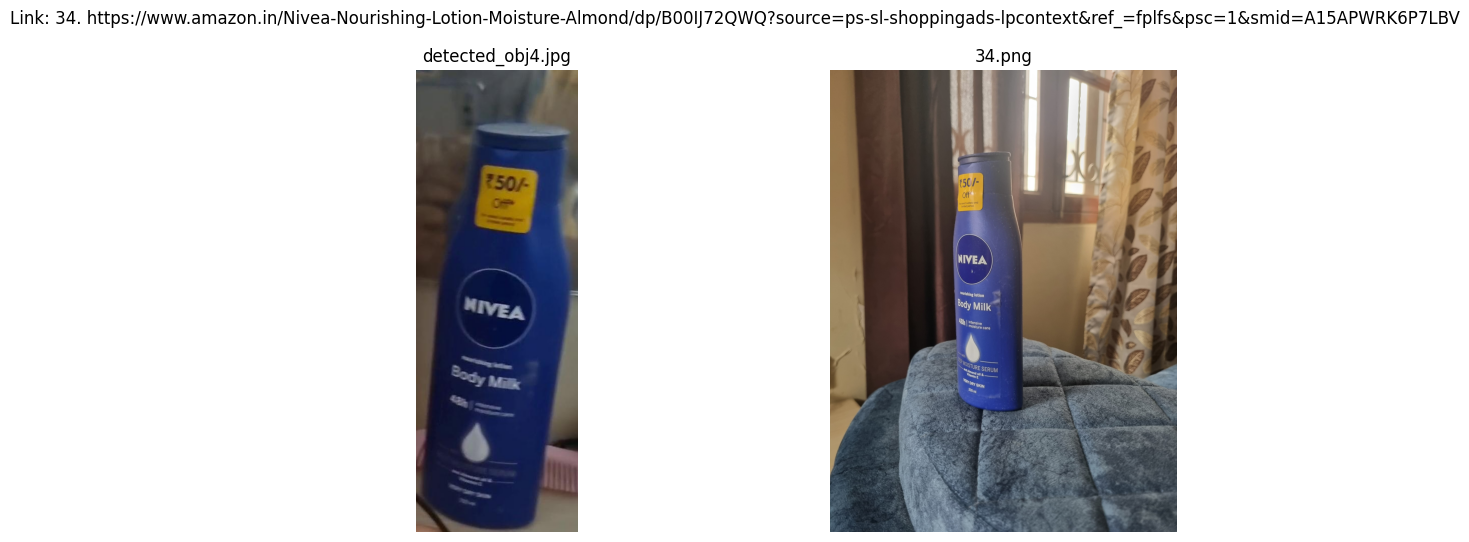

Similarity between detected_objects15.jpg and 2.png: 0.77
Link for 2.png: 2. https://www.amazon.in/Nivea-Nourishing-Lotion-Moisture-Almond/dp/B00IJ72QWQ?source=ps-sl-shoppingads-lpcontext&ref_=fplfs&psc=1&smid=A15APWRK6P7LBV
1


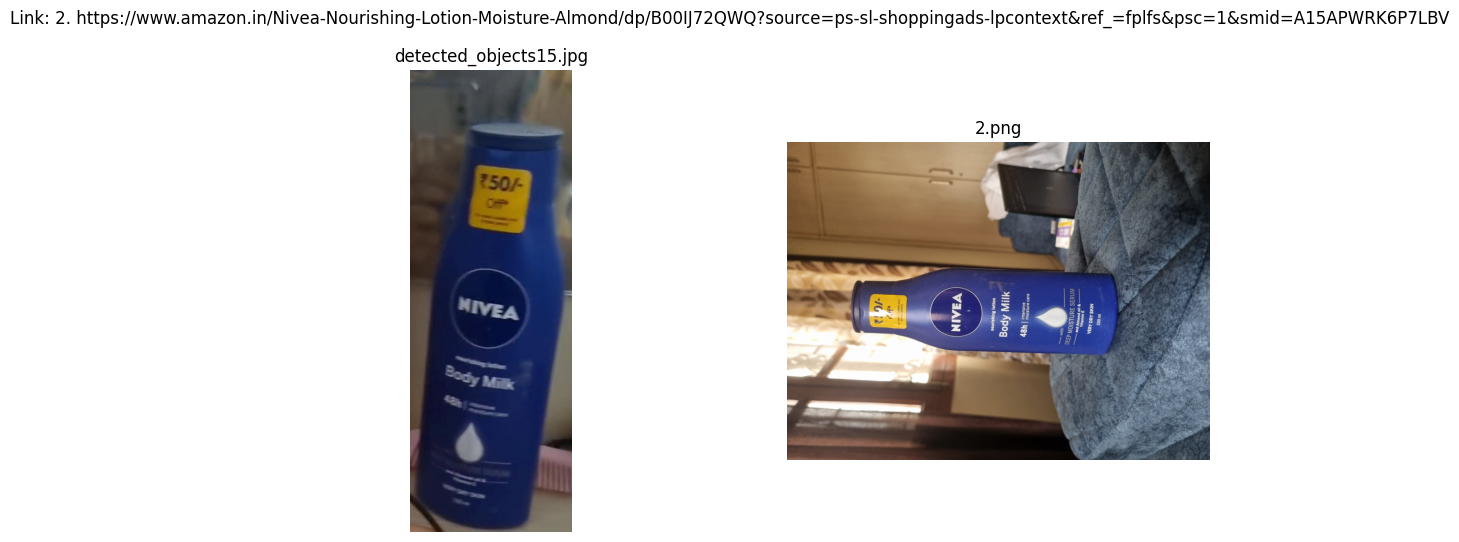

Similarity between detected_objects15.jpg and 31.png: 0.80
Link for 31.png: 31. https://www.amazon.in/Nivea-Extra-Whitening-Repair-Lotion/dp/B019XY4FOU/ref=sr_1_10?crid=2LW5743VO5RYY&dib=eyJ2IjoiMSJ9.yzaaeMXW72of1kKDS_WJXZysTdpWMlFSLNVVnrY3skK6wryiTuRxs3I0ZjM4ymTw0SCt53t8uJ3xm36C2u65az9izbh-2BsczK7Q7t1IfE6NelQH4ZVH5aXg-z9AxCfI5NfTmAsKBcIUAP4ietaPQJ8Z0DQGmrxOkpxoZIuCetIvEWUG9Cufwbc-fIaDlO-qAAtsAy8CHx22hJ3WV4xhtKgX82vKSlYWZfLpNn94JxfDQy5exbDgsEEKXVGGxdAwP1stTvJ-IMsQvooyrTO5DXqxvmQPtZfdx5PurnSRwyM.xzTcq4vygUANB0klAtlv2N2fg4VzbfFaPEvph6CAXNs&dib_tag=se&keywords=nivea&qid=1719056895&s=beauty&sprefix=nive%2Cbeauty%2C223&sr=1-10
30


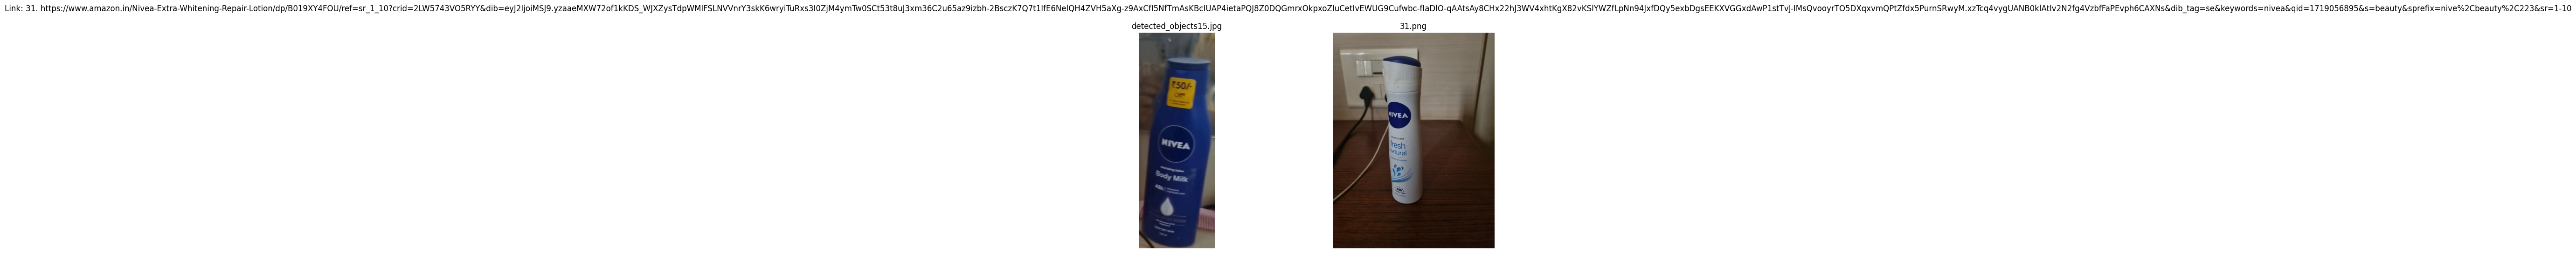

Similarity between detected_objects15.jpg and 33.png: 0.81
Link for 33.png: 33. https://www.amazon.in/Nivea-Nourishing-Lotion-Moisture-Almond/dp/B00IJ72QWQ?source=ps-sl-shoppingads-lpcontext&ref_=fplfs&psc=1&smid=A15APWRK6P7LBV
32


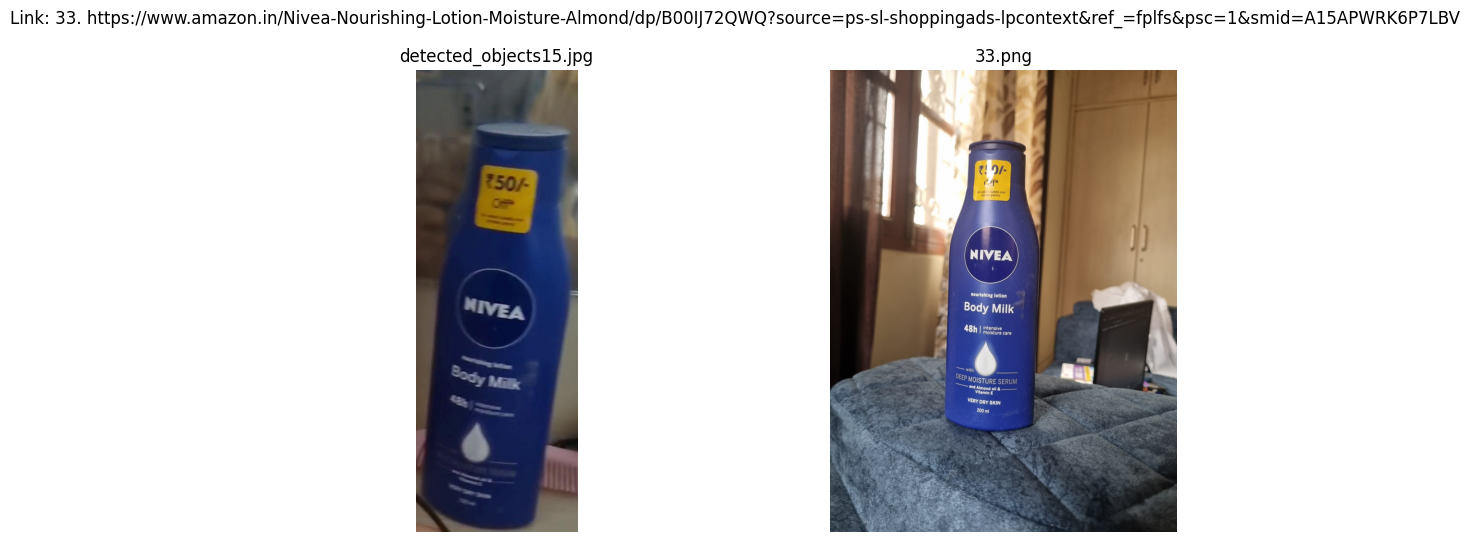

Similarity between detected_objects15.jpg and 34.png: 0.81
Link for 34.png: 34. https://www.amazon.in/Nivea-Nourishing-Lotion-Moisture-Almond/dp/B00IJ72QWQ?source=ps-sl-shoppingads-lpcontext&ref_=fplfs&psc=1&smid=A15APWRK6P7LBV
33


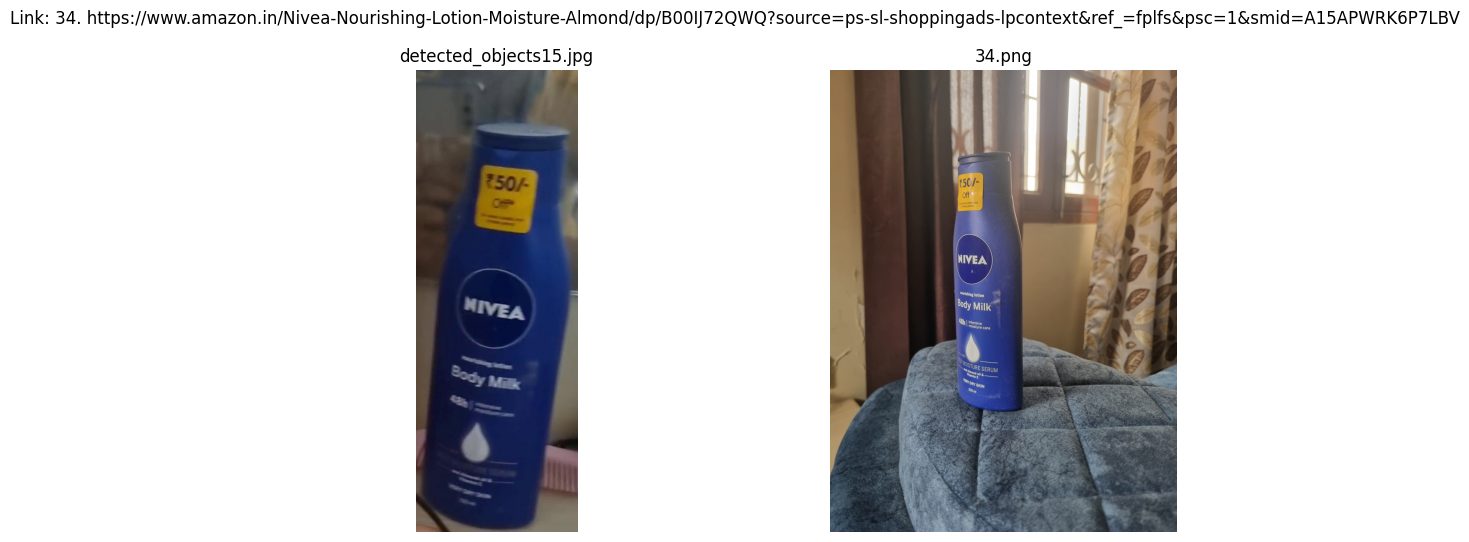

Similarity between detected_objects16.jpg and 2.png: 0.77
Link for 2.png: 2. https://www.amazon.in/Nivea-Nourishing-Lotion-Moisture-Almond/dp/B00IJ72QWQ?source=ps-sl-shoppingads-lpcontext&ref_=fplfs&psc=1&smid=A15APWRK6P7LBV
1


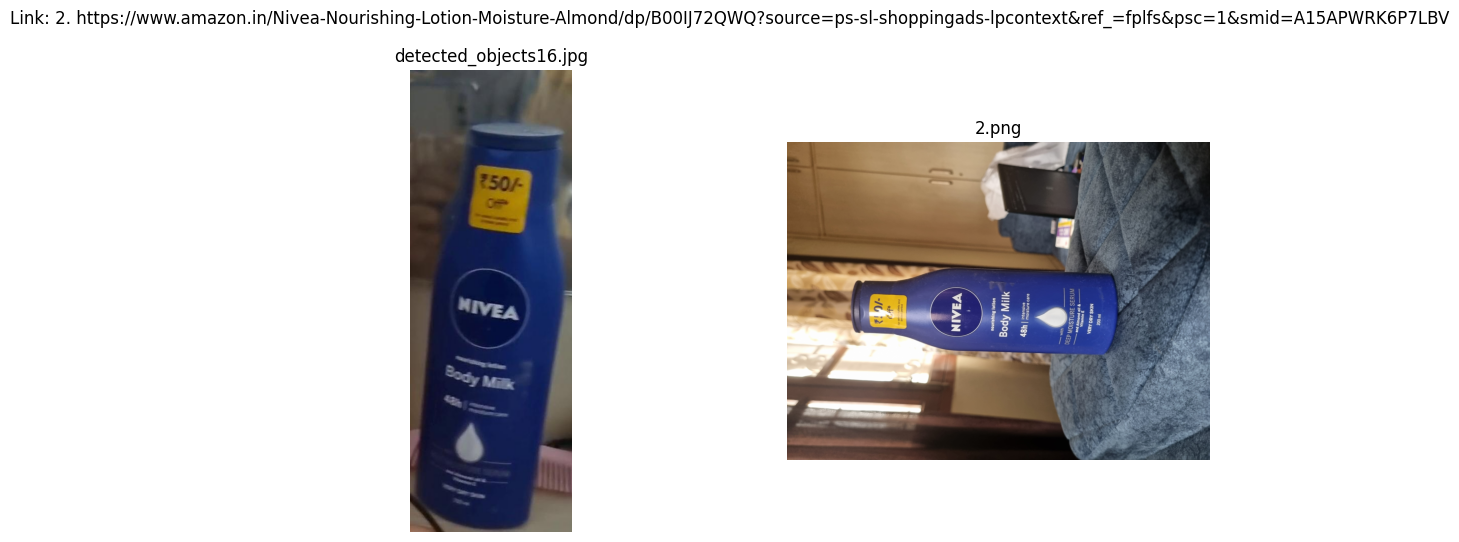

Similarity between detected_objects16.jpg and 31.png: 0.80
Link for 31.png: 31. https://www.amazon.in/Nivea-Extra-Whitening-Repair-Lotion/dp/B019XY4FOU/ref=sr_1_10?crid=2LW5743VO5RYY&dib=eyJ2IjoiMSJ9.yzaaeMXW72of1kKDS_WJXZysTdpWMlFSLNVVnrY3skK6wryiTuRxs3I0ZjM4ymTw0SCt53t8uJ3xm36C2u65az9izbh-2BsczK7Q7t1IfE6NelQH4ZVH5aXg-z9AxCfI5NfTmAsKBcIUAP4ietaPQJ8Z0DQGmrxOkpxoZIuCetIvEWUG9Cufwbc-fIaDlO-qAAtsAy8CHx22hJ3WV4xhtKgX82vKSlYWZfLpNn94JxfDQy5exbDgsEEKXVGGxdAwP1stTvJ-IMsQvooyrTO5DXqxvmQPtZfdx5PurnSRwyM.xzTcq4vygUANB0klAtlv2N2fg4VzbfFaPEvph6CAXNs&dib_tag=se&keywords=nivea&qid=1719056895&s=beauty&sprefix=nive%2Cbeauty%2C223&sr=1-10
30


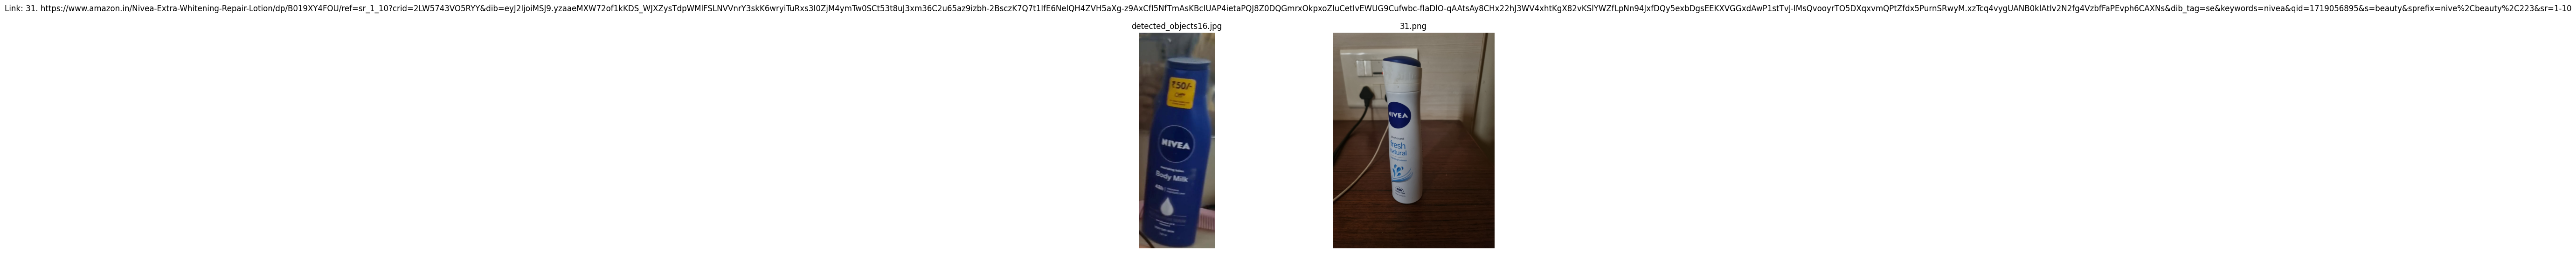

Similarity between detected_objects16.jpg and 33.png: 0.81
Link for 33.png: 33. https://www.amazon.in/Nivea-Nourishing-Lotion-Moisture-Almond/dp/B00IJ72QWQ?source=ps-sl-shoppingads-lpcontext&ref_=fplfs&psc=1&smid=A15APWRK6P7LBV
32


Similarity between detected_objects16.jpg and 34.png: 0.81
Link for 34.png: 34. https://www.amazon.in/Nivea-Nourishing-Lotion-Moisture-Almond/dp/B00IJ72QWQ?source=ps-sl-shoppingads-lpcontext&ref_=fplfs&psc=1&smid=A15APWRK6P7LBV
33


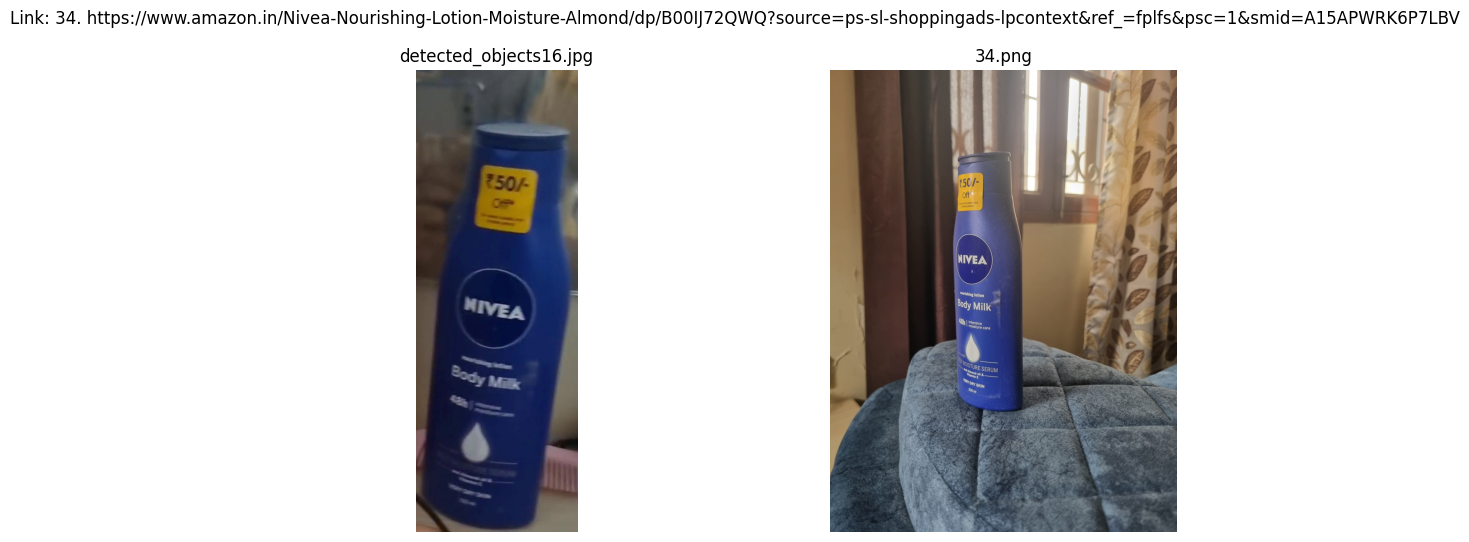

In [186]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from scipy.spatial.distance import cosine

def compute_similarity_score(features1, features2):
    return 1 - cosine(features1, features2)

detected_objects_dir = 'detected_objects5'
data_objects_dir2 = 'datasetImgs'

with open('links.txt', 'r') as file:
    links = [line.strip() for line in file.readlines()]

image_files = sorted([f for f in os.listdir(detected_objects_dir) if f.endswith('.jpg')])

image_files2 = [f for f in os.listdir(data_objects_dir2) if f.endswith('.png')]

def numeric_key(filename):
    base_name = filename.split('.')[0]
    return int(''.join(filter(str.isdigit, base_name)))

image_files2.sort(key=numeric_key)

print("Sorted filenames:", image_files2)
links=links[:len(image_files2)]

assert len(links) == len(image_files2), "Links count does not match the number of detected images"


for i in range(len(image_files)):
    for j in range(len(image_files2)):
        image_path1 = os.path.join(detected_objects_dir, image_files[i])
        image_path2 = os.path.join(data_objects_dir2, image_files2[j])


        features1 = extract_features(image_path1)
        features2 = extract_features(image_path2)

        similarity_score = compute_similarity_score(features1, features2)

        if similarity_score > 0.76:
            print(f'Similarity between {image_files[i]} and {image_files2[j]}: {similarity_score:.2f}')
            print(f'Link for {image_files2[j]}: {links[j]}')

            img1 = Image.open(image_path1)
            img2 = Image.open(image_path2)

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))
            axs[0].imshow(img1)
            axs[0].set_title(image_files[i])
            axs[0].axis('off')

            axs[1].imshow(img2)
            axs[1].set_title(image_files2[j])
            axs[1].axis('off')

            print(j)
            plt.suptitle(f'Link: {links[j]}', fontsize=12)
            plt.show()
